In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
import sklearn as sk
import scipy as sp

In [2]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
np.random.seed(0)
C = np.random.normal(100, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)

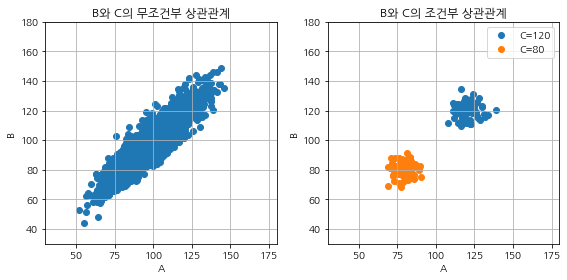

In [8]:
plt. figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(A, B)
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.grid(True)
plt.title('B와 C의 무조건부 상관관계')

plt.subplot(122)
idx1 = (118 < C) & (C < 122)
idx2 = (78 < C) & (C < 82)
plt.scatter(A[idx1], B[idx1], label="C=120")
plt.scatter(A[idx2], B[idx2], label="C=80")
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.grid(True)
plt.legend()
plt.title("B와 C의 조건부 상관관계")

plt.tight_layout()
plt.show()


## 예제

실수인 두 개의 독립변수 $x_1, x_2$와 두 종류의 클래스 $y=0,1$을 가지는 분류문제가 있다. 

두 독립변수의 분포는 정규분포이고 $y$의 클래스에 따라 다음처럼 모수가 달라진다.

$$ 
\mu_0 = \begin{bmatrix} -2 \\ -2 \end{bmatrix},
\;\; 
\Sigma_0 = \begin{bmatrix} 1 & 0.9 \\ 0.9 & 2 \end{bmatrix} 
$$
$$ 
\mu_1 = \begin{bmatrix} 2 \\ 2 \end{bmatrix},
\;\; 
\Sigma_1 = \begin{bmatrix} 1.2 & -0.8 \\ -0.8 & 2 \end{bmatrix} 
$$

데이터는 $y=0$인 데이터가 40개, $y=1$인 데이터가 60개 주어졌다. 이 데이터를 시각화하면 다음과 같다.

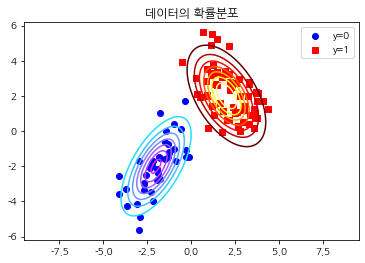

In [4]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title("데이터의 확률분포")
plt.axis("equal")
plt.show()

In [5]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [6]:
# Y의 클래스 
model_norm.classes_

array([0., 1.])

In [7]:
#Y의 값이 특정한 클래스인 표본 데이터 수 
model_norm.class_count_

array([40., 60.])

In [8]:
#Y의 무조건부 확률분포
model_norm.class_prior_

array([0.4, 0.6])

In [11]:
# 정규분포의 기댓값        정규분포 분산
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [12]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

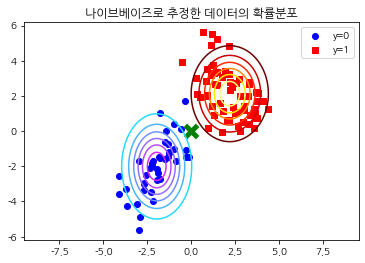

In [15]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0]) #가우시안 다변량 정규분포
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)

plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker='o', c='b', label='y=0')
plt.scatter(X1[:, 0], X1[:, 1], marker='s', c='r', label='y=1')

x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], c="g", marker="x", s=150, linewidth=5)

plt.legend()
plt.title("나이브베이즈로 추정한 데이터의 확률분포")
plt.axis("equal")
plt.show()

In [16]:
model_norm.predict_proba([x_new])

array([[0.48475244, 0.51524756]])